In [1]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Input

In [2]:
path = 'TMN'
folder_name = []
folder_paths  =[]
for root, folder, files in os.walk(path):
    folder_name.extend(folder)
    full_paths = [path+'/'+ f for f in folder]
    folder_paths.extend(full_paths)
print(folder_name)
print(folder_paths)

['Maahi', 'Mostafijur', 'Nura', 'Tauhid']
['TMN/Maahi', 'TMN/Mostafijur', 'TMN/Nura', 'TMN/Tauhid']


In [3]:
folder_path=[]
for i in folder_paths:
    folder_path.append(i+'/')
folder_path

['TMN/Maahi/', 'TMN/Mostafijur/', 'TMN/Nura/', 'TMN/Tauhid/']

In [4]:
persons = [[] for _ in folder_path]
for i in range(len(folder_path)):
    for _, _, file_name in os.walk(folder_path[i]):
        persons[i].extend(file_name)

In [5]:
person_1=[]
person_2=[]
person_3=[]
person_4=[]
for i in range(len(persons)):
    for j in range(len(persons[i])):
        if(i == 0):
            person = persons[i][j]
            label = folder_name[i]
            classification=0
            person_1.append([person, label,classification])
        elif(i == 1):
            person = persons[i][j]
            label = folder_name[i]
            classification=1
            person_2.append([person, label, classification])
        elif(i == 2):
            person = persons[i][j]
            label = folder_name[i]
            classification=2
            person_3.append([person, label, classification])
        elif(i == 3):
            person = persons[i][j]
            label = folder_name[i]
            classification=3
            person_4.append([person, label, classification])

In [6]:
full_data = []
for i in range(4):
    if i == 0:
        for i in range(len(person_1)):
            full_data.append(person_1[i])
    elif i == 1:
        for i in range(len(person_2)):
            full_data.append(person_2[i])
    elif i == 2:
        for i in range(len(person_3)):
            full_data.append(person_3[i])
    elif i == 3:
        for i in range(len(person_4)):
            full_data.append(person_4[i])

In [7]:
print(len(person_1), len(person_2), len(person_3), len(person_4))

215 202 203 202


In [8]:
random.shuffle(full_data)
len(full_data)


822

(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)


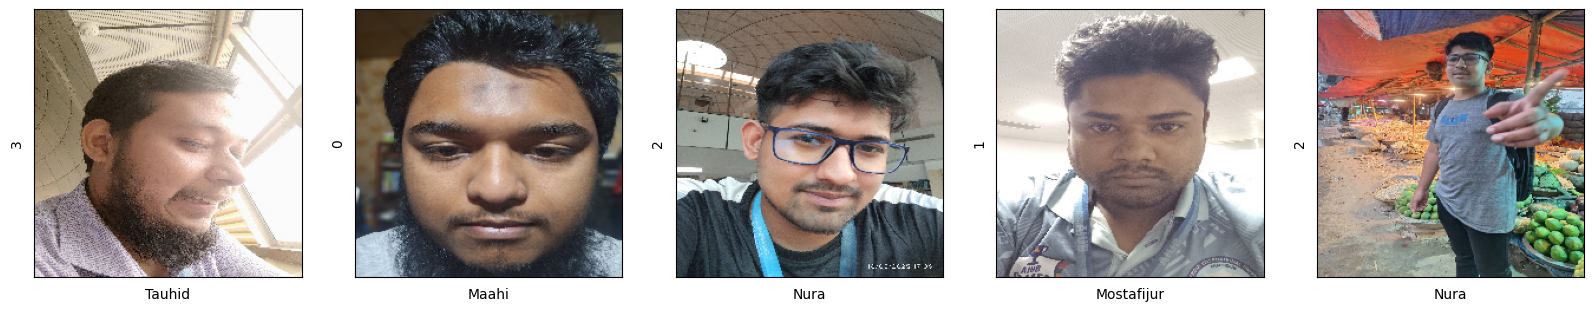

In [9]:
plt.figure(figsize=(20,10))
c=0
for i in range(5):
    plt.subplot(1,5,c+1)
    if(full_data[i][2] == 0):
        img_path = os.path.join(folder_path[0], full_data[i][0])
    elif(full_data[i][2]==1):
        img_path = os.path.join(folder_path[1], full_data[i][0])
    elif(full_data[i][2]==2):
        img_path = os.path.join(folder_path[2], full_data[i][0])
    elif(full_data[i][2]==3):
        img_path = os.path.join(folder_path[3], full_data[i][0])
    
    image = cv2.imread(img_path)
    image = cv2.resize(image, (227,227))
    image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image.shape)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(full_data[i][1])
    plt.ylabel(full_data[i][2])
    c+=1

In [10]:
len(full_data)

822

In [11]:

test_size = round((len(full_data)*.15))

test_data = random.sample(full_data, test_size)

train_data = [data for data in full_data if data not in test_data]

print(f"Test Data ({test_size} samples): {test_data}")
print(f"Train Data ({len(train_data)} samples): {train_data}")


Test Data (123 samples): [['Maahi_0200.jpg', 'Maahi', 0], ['nura_135.jpg', 'Nura', 2], ['Maahi_00091.jpg', 'Maahi', 0], ['nura_71.jpg', 'Nura', 2], ['tauhid_188.jpg', 'Tauhid', 3], ['Maahi_88.jpg', 'Maahi', 0], ['Mostafij_145.jpg', 'Mostafijur', 1], ['tauhid_216.jpg', 'Tauhid', 3], ['nura_207.jpg', 'Nura', 2], ['tauhid_316.jpg', 'Tauhid', 3], ['tauhid_39.jpg', 'Tauhid', 3], ['Mostafij_3.jpg', 'Mostafijur', 1], ['Mostafij_49.jpg', 'Mostafijur', 1], ['nura_18.jpg', 'Nura', 2], ['tauhid_41.jpg', 'Tauhid', 3], ['tauhid_249.jpg', 'Tauhid', 3], ['tauhid_275.jpg', 'Tauhid', 3], ['nura_185.jpg', 'Nura', 2], ['tauhid_243.jpg', 'Tauhid', 3], ['nura_113.jpg', 'Nura', 2], ['tauhid_55.jpg', 'Tauhid', 3], ['Maahi_00119.jpg', 'Maahi', 0], ['Mostafij_189.jpg', 'Mostafijur', 1], ['Maahi_0185.jpg', 'Maahi', 0], ['nura_80.jpg', 'Nura', 2], ['Maahi_00052.jpg', 'Maahi', 0], ['tauhid_189.jpg', 'Tauhid', 3], ['Maahi_0188.jpg', 'Maahi', 0], ['Mostafij_157.jpg', 'Mostafijur', 1], ['tauhid_256.jpg', 'Tauhid', 3

In [12]:
image_shape=(227,227)

# Train Data

In [13]:

X_train = []
Y_train=[]
for data in train_data:
    label = data[2]  
    Y_train.append(label)
    if label == 0:
        img_path = os.path.join(folder_path[0], data[0])
    elif label == 1:
        img_path = os.path.join(folder_path[1], data[0])
    elif label == 2:
        img_path = os.path.join(folder_path[2], data[0])
    elif label == 3:
        img_path = os.path.join(folder_path[3], data[0])
    else:
        continue  
    image = cv2.imread(img_path)
    image = cv2.resize(image,image_shape)
    if image is not None:  
        X_train.append(image)

X_train = np.array(X_train)
Y_train=np.array(Y_train)
Y_train = np.reshape(Y_train, (-1, 1))
print(f"Shape of X is : {X_train.shape}")
print(f"Shape of Y is : {Y_train.shape}")

Shape of X is : (699, 227, 227, 3)
Shape of Y is : (699, 1)


# Test Data

In [14]:
X_test =[]
Y_test=[]
for data in test_data:
    label = data[2]
    if label == 0:
        img_path = os.path.join(folder_path[0],data[0])
    elif label == 1:
        img_path = os.path.join(folder_path[1],data[0])
    elif label == 2:
        img_path = os.path.join(folder_path[2],data[0])
    elif label == 3:
        img_path = os.path.join(folder_path[3],data[0])
    image = cv2.imread(img_path)
    image = cv2.resize(image, image_shape)
    X_test.append(image)
    Y_test.append(label)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_test = np.reshape(Y_test, (-1,1))

In [15]:

print(f"Shape of X is : {X_test.shape}")
print(f"Shape of Y is : {Y_test.shape}")

Shape of X is : (123, 227, 227, 3)
Shape of Y is : (123, 1)


In [16]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU : {len(gpu_device)}")

Number of GPU : 1


In [17]:
#(X_train, Y_train),(X_test, Y_test) = cifar100.load_data()

In [18]:
print(f"Shape of Train data : {X_train.shape} and label : {Y_train.shape}")
print(f"Shape of Test data : {X_test.shape} and label : {Y_test.shape}")

Shape of Train data : (699, 227, 227, 3) and label : (699, 1)
Shape of Test data : (123, 227, 227, 3) and label : (123, 1)


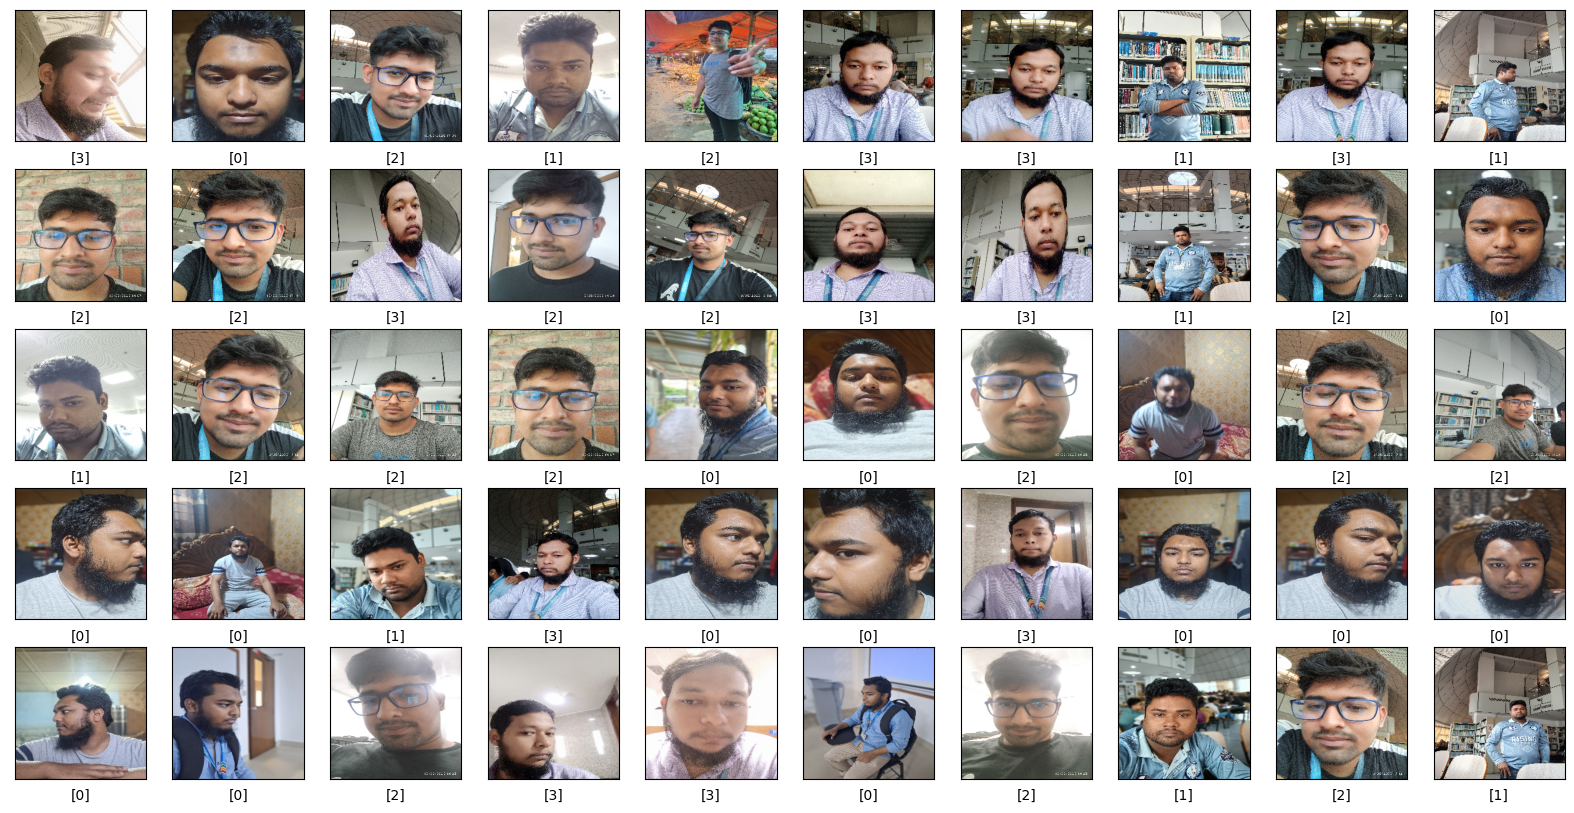

In [19]:
i = 0
plt.figure(figsize=(20,10))
for img in range(50):
    plt.subplot(5, 10, i+1)
    image = cv2.cvtColor(X_train[img],cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.xlabel(Y_train[img])
    plt.xticks([])
    plt.yticks([])
    i +=1
plt.show()

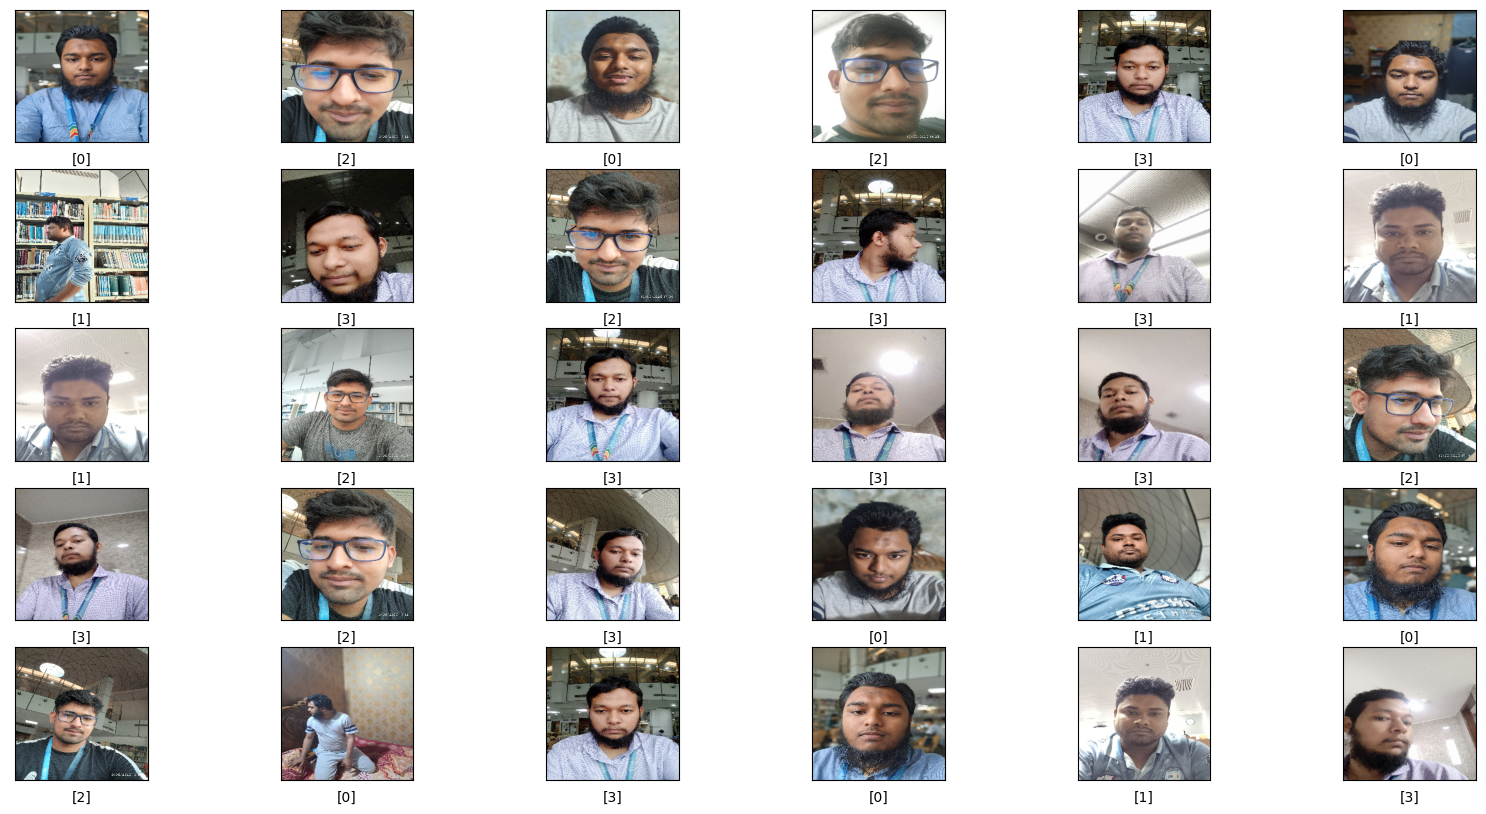

In [20]:
i = 0
plt.figure(figsize=(20,10))
for img in range(30):
    plt.subplot(5, 6, i+1)
    image = cv2.cvtColor(X_test[img],cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.xlabel(Y_test[img])
    plt.xticks([])
    plt.yticks([])
    i +=1
plt.show()

In [21]:
train_mean = np.mean(X_train, axis=0)
test_mean = np.mean(X_test, axis=0)
train_mean.shape, test_mean.shape

((227, 227, 3), (227, 227, 3))

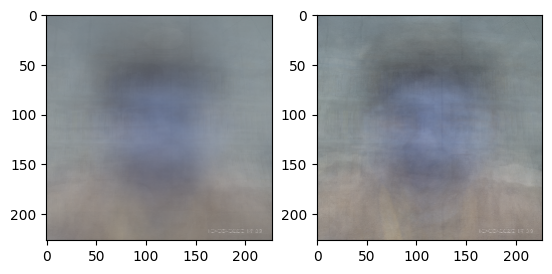

In [22]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(train_mean.astype('uint8'))
plt.subplot(1,2,2)
plt.imshow(test_mean.astype('uint8'))
plt.show()


# Substract data by mean value

In [23]:
X_train_norm, X_test_norm = X_train - train_mean, X_test - test_mean

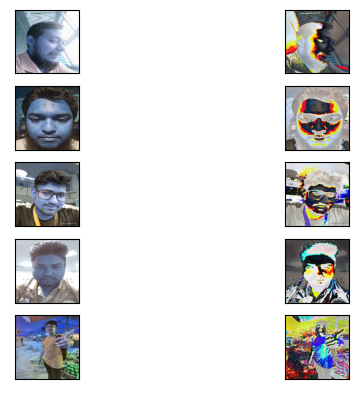

In [24]:
plt.figure()
c =0
for i in range(5):
    plt.subplot(5, 2,c+1 )
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    plt.subplot(5, 2,c+2 )
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    c+=2

plt.show()

In [ ]:
X_train.shape[1:]

In [26]:


# Define input shape
input_shape = X_train.shape[1:]

# If you get an OSError about truncated file, clear the Keras cache and re-download weights:
import os
keras_cache = os.path.expanduser('~/.keras/models/')
for fname in os.listdir(keras_cache):
	if 'mobilenet_v2' in fname:
		os.remove(os.path.join(keras_cache, fname))

# Load base model without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

# Freeze base model layers
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)  # Replace 4 with your number of classes

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Summary
model.summary()


9406464/9406464 [==============================] - 5s 1us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 114, 114, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 114, 114, 32  128         ['Conv1[0][0]']                  
                               

In [27]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


In [28]:
early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=3,           
    restore_best_weights=True  
)

h = model.fit(
    x=X_train,
    y=Y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=16,
    callbacks=[early_stop]  
)


Epoch 1/20
35/35 [==============================] - 11s 100ms/step - loss: 2.8070 - accuracy: 0.4436 - val_loss: 1.7498 - val_accuracy: 0.8071
Epoch 2/20
35/35 [==============================] - 1s 40ms/step - loss: 1.7626 - accuracy: 0.7138 - val_loss: 1.4207 - val_accuracy: 0.8214
Epoch 3/20
35/35 [==============================] - 1s 40ms/step - loss: 1.3588 - accuracy: 0.8354 - val_loss: 1.2008 - val_accuracy: 0.8786
Epoch 4/20
35/35 [==============================] - 1s 40ms/step - loss: 1.2025 - accuracy: 0.8497 - val_loss: 1.0154 - val_accuracy: 0.9071
Epoch 5/20
35/35 [==============================] - 1s 42ms/step - loss: 1.0680 - accuracy: 0.8694 - val_loss: 0.9392 - val_accuracy: 0.9214
Epoch 6/20
35/35 [==============================] - 1s 41ms/step - loss: 0.9335 - accuracy: 0.9123 - val_loss: 0.8790 - val_accuracy: 0.9143
Epoch 7/20
35/35 [==============================] - 1s 40ms/step - loss: 0.8567 - accuracy: 0.9284 - val_loss: 0.8053 - val_accuracy: 0.9500
Epoch 8/20


In [29]:
train_loss = h.history['loss']
val_loss = h.history['val_loss']
train_acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

In [30]:
epoch = range(1, len(val_acc)+1)
epoch

range(1, 21)

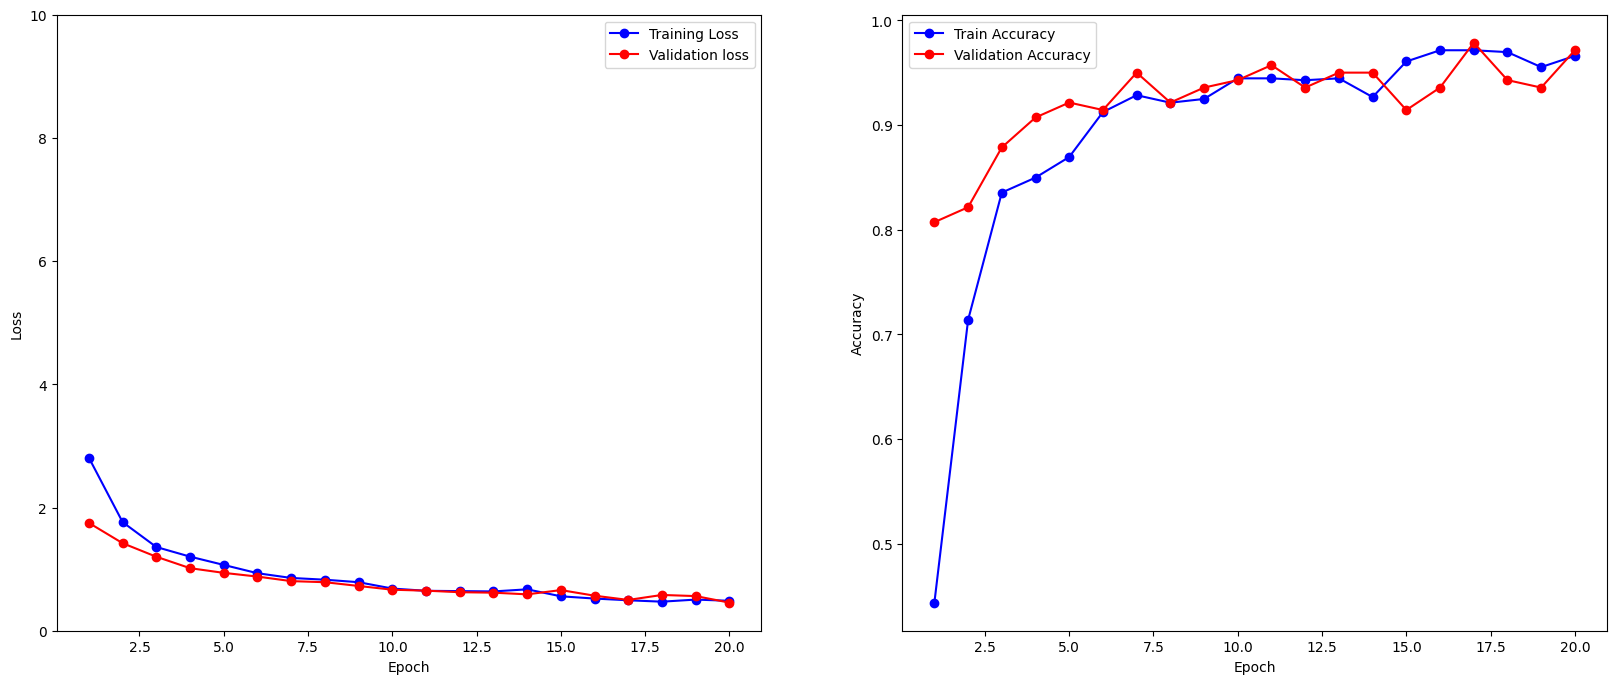

In [31]:
epoch = range(1, len(val_acc)+1)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(epoch, train_loss,'bo-', label='Training Loss')
plt.plot(epoch, val_loss,'ro-', label= 'Validation loss')
plt.ylim(0,10)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_acc,'bo-', label='Train Accuracy')
plt.plot(epoch, val_acc,'ro-', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

4/4 [==============================] - 2s 268ms/step - loss: 0.4211 - accuracy: 0.9837

Test Accuracy: 0.9837398529052734

Test Loss: 0.42109283804893494


In [33]:
probability = model.predict(X_test)

4/4 [==============================] - 1s 59ms/step


In [34]:
(probability[0].max() *100).round(2)

99.28

In [35]:
predicted_classes = probability[0].argmax()
predicted_classes

0

In [36]:
probability[0]

array([9.9277484e-01, 6.1844229e-03, 2.3641861e-04, 8.0436503e-04],
      dtype=float32)

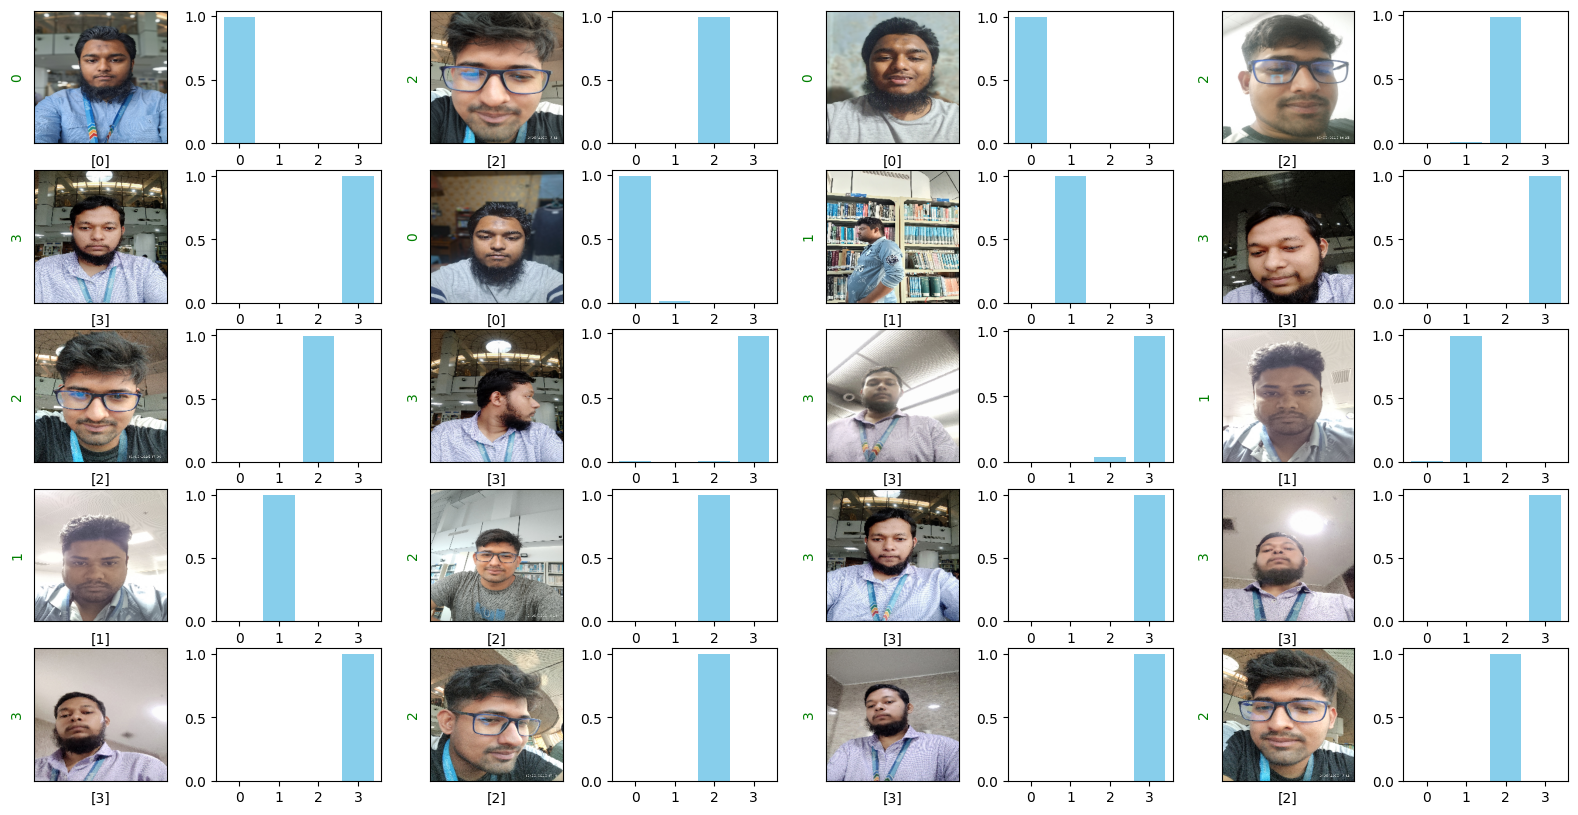

In [38]:
c=0
label=[0,1,2,3]
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,8,c+1)
    img = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.xlabel(Y_test[i])
    if(Y_test[i] == probability[i].argmax()):
        plt.ylabel(probability[i].argmax(), color='g')
    else:
        plt.ylabel(probability[i].argmax(), color='r')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5,8,c+2)
    plt.bar(range(len(probability[i])), probability[i], color='skyblue')
    plt.xticks(range(len(label)), label)
    c+=2
plt.show()
    

In [39]:
probability[0]

array([9.9277484e-01, 6.1844229e-03, 2.3641861e-04, 8.0436503e-04],
      dtype=float32)

In [41]:
model.save("model_MobileNet.h5")